# K-Nearest Neighbour

## Description

There is no training for this approach. When the test data is provided, the prediction is calculated immediately based on the approximity of the given and existing data.
    - All distances to the given data will be calculated and k number of nearest existing data will be picked.
    - This confirms that KNN works based on feature similarity.
    
KNN can be used for regression and classification.

As k value is increased, the bias also increases but variance reduces.

### How are the distances calculated?
- Euclidian Distance
- Manhattan Distance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Breast Cancer Example

### Load Data

In [2]:
from sklearn.datasets import load_breast_cancer

In [8]:
cancer = load_breast_cancer()

In [9]:
# The data set is in dictionary form
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [31]:
x_data = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [32]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [33]:
x_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
y_data = pd.DataFrame(cancer['target'], columns=['Cancer'])

In [35]:
y_data.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


### Preprocessing Data

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
x_data_scaled = sc.fit_transform(x_data)

In [38]:
x_data = pd.DataFrame(x_data_scaled, columns=x_data.columns)

In [39]:
x_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Split Data

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, np.ravel(y_data), test_size=0.3, random_state=105)

### Generate model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(x_train, y_train)

### Predict

In [54]:
y_pred = knn.predict(x_test)

### Evaluate Results

In [55]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.93      0.92        59\n           1       0.96      0.96      0.96       112\n\n    accuracy                           0.95       171\n   macro avg       0.94      0.94      0.94       171\nweighted avg       0.95      0.95      0.95       171\n'

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 55,   4],
       [  5, 107]])

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9473684210526315

### How to pick the correct value for k?

In [59]:
error_rate = []
# Let's try 40 times
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

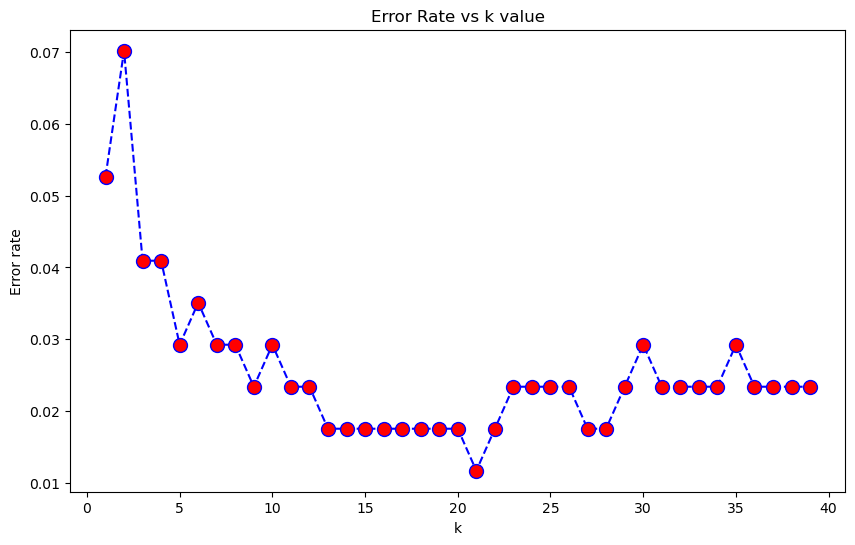

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs k value')
plt.xlabel('k')
plt.ylabel('Error rate')

## Iris Example

### Load Data

In [62]:
iris_data = pd.read_csv('files/iris_data.csv')

In [63]:
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Analyze Data

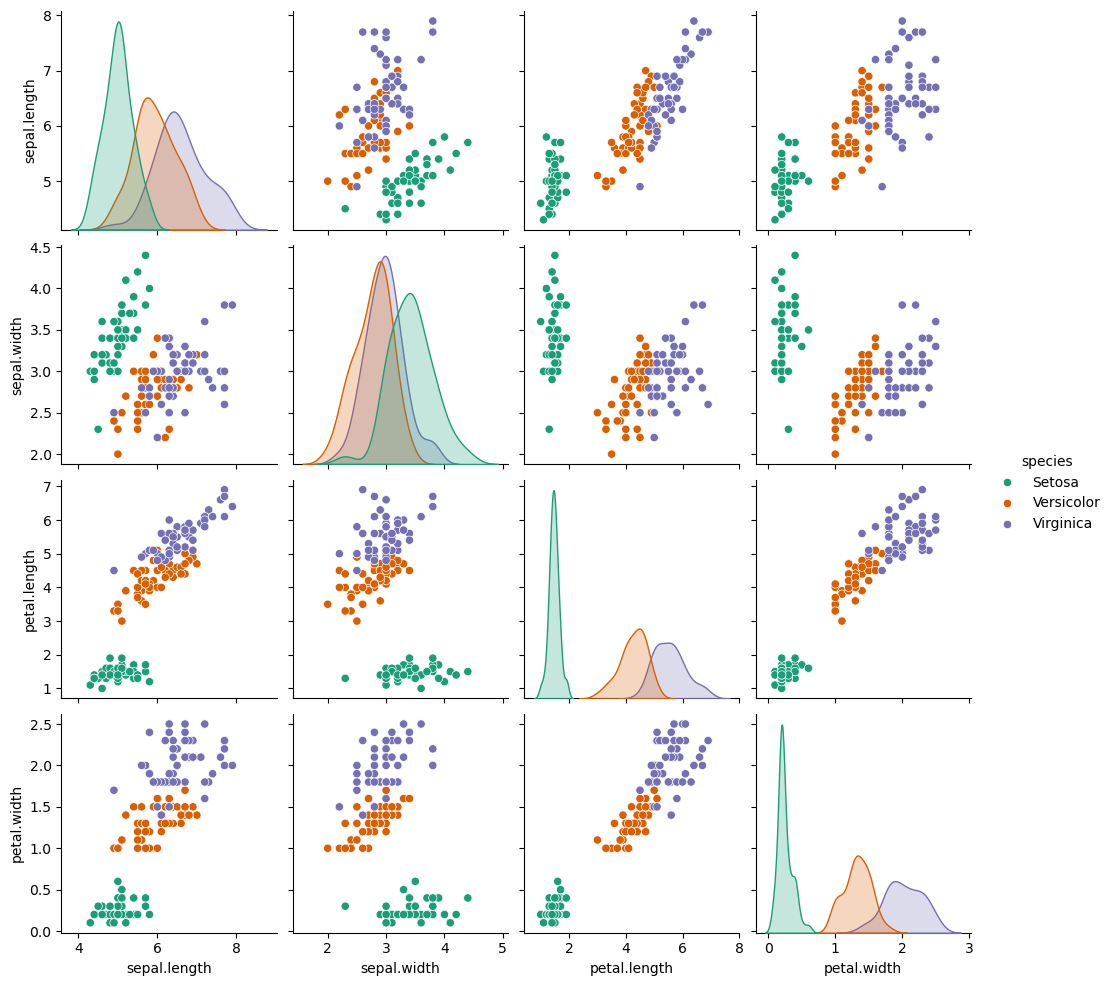

In [64]:
sns.pairplot(data=iris_data, hue='species', palette='Dark2')

In [73]:
setosa = iris_data.loc[iris_data['species'] == 'Setosa']
setosa

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


/tmp/ipykernel_4406/3623492881.py:1: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=setosa['sepal.width'], y=setosa['sepal.length'], cmap='plasma', shade=True, shade_lowest=False)
/tmp/ipykernel_4406/3623492881.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=setosa['sepal.width'], y=setosa['sepal.length'], cmap='plasma', shade=True, shade_lowest=False)


<Axes: xlabel='sepal.width', ylabel='sepal.length'>

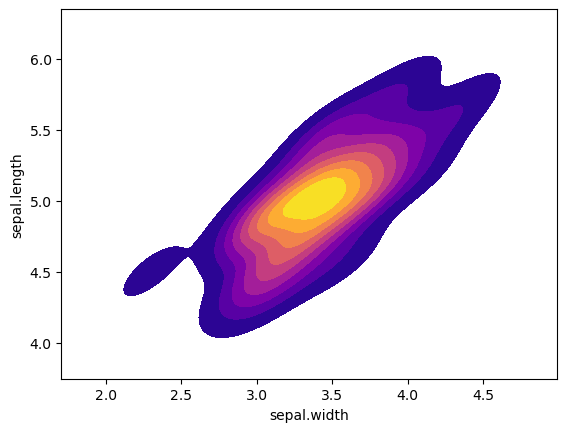

In [77]:
sns.kdeplot(x=setosa['sepal.width'], y=setosa['sepal.length'], cmap='plasma', shade=True, shade_lowest=False)

We have almost linear relationship between length and width.

### Extract Data

In [79]:
# Independent data (Features)
x_data = iris_data.drop('species', axis=1)
# Dependent variable (Labels)
y_data = iris_data['species']

### Preprocessing Data

In [78]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc = StandardScaler()
x_data_scaled = sc.fit_transform(x_data)

In [81]:
x_data = pd.DataFrame(x_data_scaled, columns=x_data.columns)

In [82]:
x_data.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Split data

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=103)

### Generate model

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(x_train, y_train)

### Predict

In [86]:
y_pred = knn.predict(x_test)

### Evaluate Results

In [87]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n      Setosa       1.00      1.00      1.00        14\n  Versicolor       0.87      1.00      0.93        13\n   Virginica       1.00      0.89      0.94        18\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.96        45\nweighted avg       0.96      0.96      0.96        45\n'

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 16]])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9555555555555556

In [90]:
error_rate = []
# Let's try 40 times
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

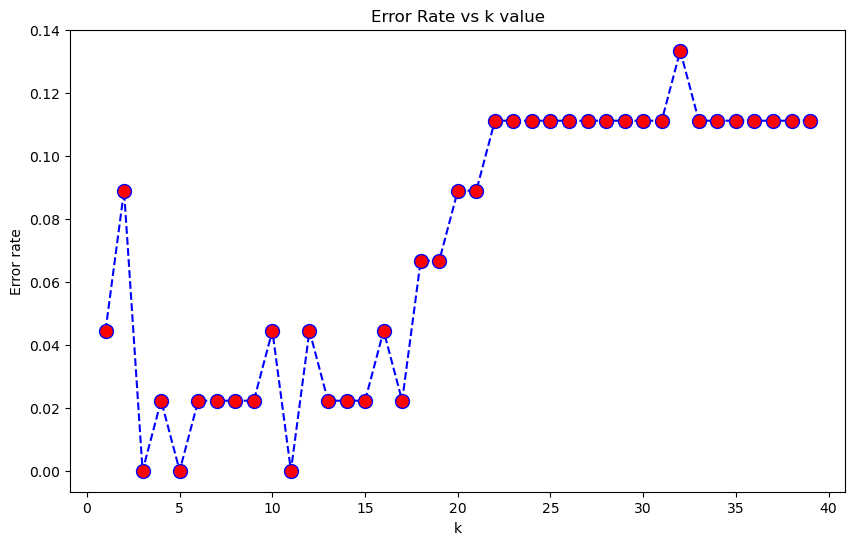

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs k value')
plt.xlabel('k')
plt.ylabel('Error rate')

k with value of 3 or 5 or 11 gives the best results.